<a href="https://colab.research.google.com/github/saishdesai23/Loan-Interest-Prediction/blob/main/case_study_1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study 1

## 1. Importing python libraries

In [2]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Loading the data from a csv file into a pandas dataframe

In [3]:
# importing the data set
loan_data = pd.read_csv("/content/loans_full_schema.csv")
loan_data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## 3. Describing the data set

In [4]:
# Stats of the numerical variables in the dataframe
df1_transposed = loan_data.describe().T
df1_transposed = df1_transposed.reset_index()
df1_transposed.rename(columns={"index":"Column_name"}, inplace=True)

In [5]:
# Describing the details of each column in a data frame
l1 = list(loan_data.columns)
l2 = list(loan_data.dtypes)
l3 = list(loan_data.isna().sum())
data_describe = pd.DataFrame(zip(l1,l2,l3),columns =['Column_name', 'Data_Type','Null_count'])
data_describe['isnull'] = np.where(data_describe['Null_count'] !=0,'T','F')
data_describe['Null_percent'] = round((data_describe['Null_count']*100)/len(loan_data),3)
data_describe['Non_num'] = np.where(data_describe['Data_Type'] =='object','T','F')
data_describe = data_describe.merge(df1_transposed, on='Column_name', how='left')
data_describe

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_income,float64,0,F,0.00,F,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01


In [6]:
# listing columns with missing values
data_missing = data_describe[data_describe['isnull'] == 'T']
data_missing

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.00,10.0000,10.00
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.57,25.0025,469.09
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.00,151545.5000,1100000.00
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.72,25.5000,39.98
11,months_since_last_delinq,float64,5658,T,56.58,F,4342.0,36.760709,21.634939,1.00,19.0000,34.00,53.0000,118.00
20,months_since_90d_late,float64,7715,T,77.15,F,2285.0,46.112473,21.748021,2.00,29.0000,47.00,63.0000,128.00
25,months_since_last_credit_inquiry,float64,1271,T,12.71,F,8729.0,7.340703,5.981590,0.00,2.0000,6.00,11.0000,24.00
27,num_accounts_120d_past_due,float64,318,T,3.18,F,9682.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00


In [7]:
# listing columns with object datatype
data_object = data_describe[data_describe['Non_num'] == 'T']
data_object

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,loan_purpose,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,application_type,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,sub_grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,issue_month,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We describe the data by listing all the parameters and properties of the columns (predictors) in a separate dataframe.

The properties we describe for each column are


*   Data type
*   Null count
*   Null percent
*   Statistical parameters for numerical variables




## 4. Data Visualization


### 1. Visualizing the data for different states within the United States. 

The data set has loans made through the Lending Club platform for all the states except 'IOWA'.

Here, we will plot the statewise distribution of 3 factors which can serve as major contributors in predicting the interest rate-

1.   anual_income - anual income of the employee
2.   public_record_bankrupt - Number of bankruptcies listed in the public record for this applicant.
2.   delinq_2y - Delinquencies on lines of credit in the last 2 years.




In [74]:
# Total value of 'annual_income','public_record_bankrupt' and 'delinq_2y' per state
loan_region = loan_data.groupby(['state']).sum().reset_index()
loan_region = loan_region[['state','annual_income','public_record_bankrupt','delinq_2y']]
print(loan_region.head(5))

# Number of applicants per state
applicant_count = loan_data.groupby(['state']).count().reset_index()['interest_rate']
print(applicant_count.head(5))

# Normalizing the total value of all the factors with the loan approval count per state
print("Normalized values")
loan_region['annual_income'] = round(loan_region['annual_income']/applicant_count,2)
loan_region['public_record_bankrupt'] = round(loan_region['public_record_bankrupt']/applicant_count,2)
loan_region['delinq_2y'] = round(loan_region['delinq_2y']/applicant_count,2)
print(loan_region.head(5))

para = ['annual_income','public_record_bankrupt','delinq_2y']
for ele in para:
  print(ele.title()+ " per loan approval across all states in the United States")
  l = list(loan_region[ele])
  fig = px.choropleth(loan_region, color = list(loan_region[ele]),
                           locations=list(loan_region['state']),
                           locationmode="USA-states",
                           color_continuous_scale="Darkmint",
                           range_color=(min(l), max(l)),
                           hover_name="state",
                           scope="usa",
                           labels={'color': ele.lower() + " per loan approval", 'locations':'states'}
                          )
  

  fig.show()


  state  annual_income  public_record_bankrupt  delinq_2y
0    AK   2.561433e+06                       2          2
1    AL   8.494027e+06                      19         16
2    AR   4.783620e+06                      13         10
3    AZ   1.940614e+07                      41         49
4    CA   1.182145e+08                     235        292
0      33
1     122
2      70
3     255
4    1330
Name: interest_rate, dtype: int64
Normalized values
  state  annual_income  public_record_bankrupt  delinq_2y
0    AK       77619.18                    0.06       0.06
1    AL       69623.17                    0.16       0.13
2    AR       68337.43                    0.19       0.14
3    AZ       76102.51                    0.16       0.19
4    CA       88883.05                    0.18       0.22
Annual_Income per loan approval across all states in the United States


Public_Record_Bankrupt per loan approval across all states in the United States


Delinq_2Y per loan approval across all states in the United States



To normalize and compare the distribution we have calculated the total value of each factor and divded it with the loan appoval count for each state.

#### Important Observations
The total __"annual income"__ for the state 'CA' is __"USD 1.182145e+08"__ and the approval count is __"1330"__. So Annual Income per applicant will be __"USD 88883.048767"__.
However the __"public_record_bankrupt"__  and __"deliquencies"__ are sufficently high for this state.

The Annual Income per loan approval is high for "WY". This is because either there are very few applicants in this state or most of the loans application might have got rejected.

Thus, based on these factors across the states, we can put them into different slabs of loan schemes, where in riskier states can be alloted higher loan rates.



### 2. Loan Disbursement analysis based on the loan application reason

Each loan disbursement is based on a purpose. This purpose can be any product or service which the loan borrower needs to avial. Below we have a bar plot visualizing the average amount of loan disbursed for each loan purpose.



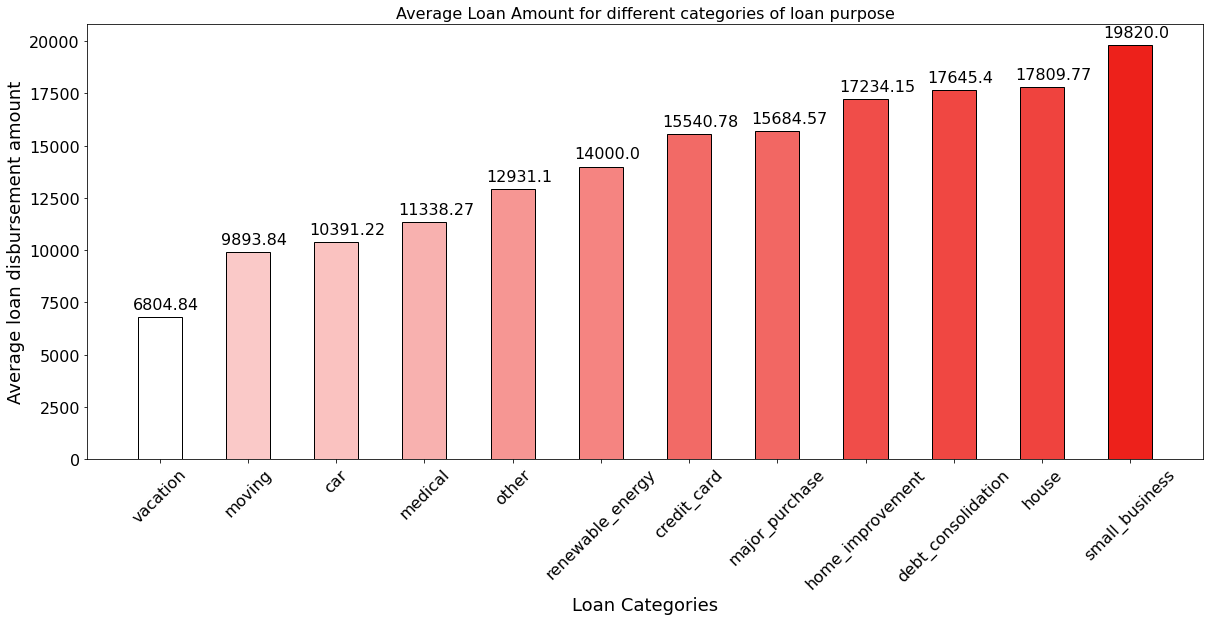

In [118]:
loan_reason = loan_data.groupby(['loan_purpose']).mean().reset_index()
loan_reason.sort_values(by='loan_amount', inplace=True)


# adjusting the color density of each bar in the plot based on the loan amount value
normalized_df=(loan_reason['loan_amount']-loan_reason['loan_amount'].min())/(loan_reason['loan_amount'].max()-loan_reason['loan_amount'].min())
normalized_df = normalized_df.to_numpy()
rgba_colors = np.zeros((12,4))
rgba_colors[:,0]=0.92968  #value of red intensity divided by 256 
rgba_colors[:,1]=0.12890  #value of green intensity divided by 256
rgba_colors[:,2]=0.10546  #value of blue intensity divided by 256
rgba_colors[:,-1]=normalized_df.reshape(1,12).flatten() # adding values of normalized loan amount (height)

plt.figure(figsize = (20,8))
plt.bar(loan_reason['loan_purpose'], height= loan_reason['loan_amount'], width=0.5, bottom=None, color = rgba_colors, edgecolor='black')


# reference - https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot
xlocs = plt.xticks()
xlocs=[i+1 for i in range(0,12)]
for i, v in enumerate(loan_reason['loan_amount']):
    plt.text(xlocs[i]-1.3, v + 400, str(round(v,2)),fontsize=16)

plt.title("Average Loan Amount for different categories of loan purpose", fontsize=16)
plt.xlabel('Loan Categories',fontsize=18)
plt.ylabel('Average loan disbursement amount',fontsize=18)
plt.xticks(loan_reason['loan_purpose'], rotation =45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

From this plot we can conclude that __"debt_consolidation"__, __"house"__ and __"small_business"__ are three major reason for loan.

People borrowing loan for above 3 reasons should be targeted and given low interest rates to bring greater profits to the lending business.

### 3. Proportions if different grade of loans

The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5.

Considering this statement, we assume that the loan risk will be graded lowest for __"A"__ and highest for __"G"__

reference article to help the labeliing of the pie chart -https://stackoverflow.com/questions/64411633/how-to-rotate-the-percentage-label-in-a-pie-chart-to-match-the-category-label-ro


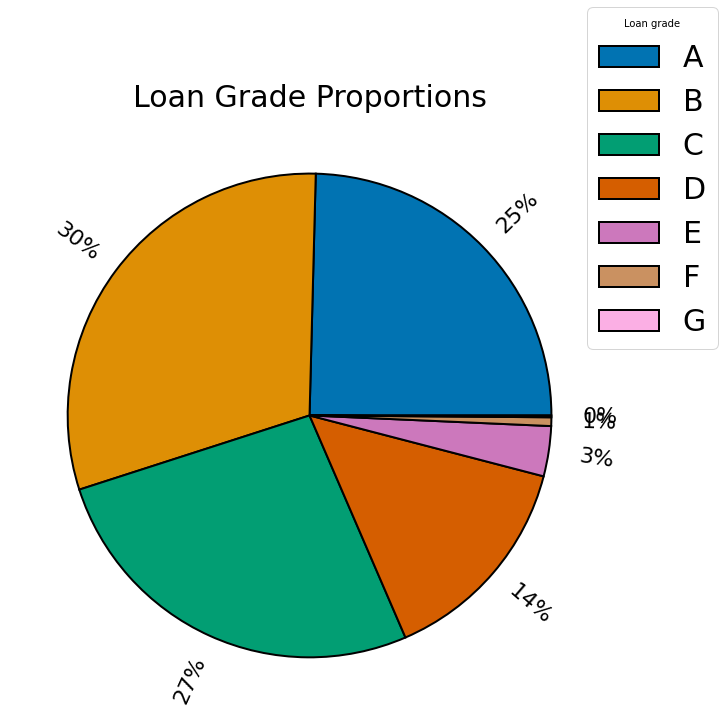

In [189]:
# https://stackoverflow.com/questions/64411633/how-to-rotate-the-percentage-label-in-a-pie-chart-to-match-the-category-label-ro
loan_grade = loan_data.groupby(['grade']).count().reset_index()
colors = sns.color_palette('colorblind')[0:7]

#creating the pie chart
plt.figure(figsize = (10,10))
patches, labels, pct_texts = plt.pie(loan_grade['loan_amount'], 
                                     colors = colors, 
                                     autopct='%.0f%%',
                                     rotatelabels=True, 
                                     pctdistance=1.2,
                                     wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True})
# labelling the pie chart
for label, pct_text in zip(labels, pct_texts):
      pct_text.set_fontsize(22)
      pct_text.set_rotation(label.get_rotation())
plt.title('Loan Grade Proportions', fontsize=30)
plt.legend(labels = loan_grade['grade'], bbox_to_anchor=(1.2, 1.2), title = "Loan grade", fontsize=30)
plt.tight_layout()
plt.show()



Here we group the entries by the 'grade' category of loans and find the propotion of loans disbursed for each category.

This can give us an insight regarding the expected loan disbursement limit for different categories. From this we can conclude that the target audience comes three lower loan grades namely, __"A"__, __"B"__ and __"C"__

### 4. Trend in the number of credit lines. 

Here, we will look at the earliest creidt lines created by each customer. We will group by the credit lines created for each year and identify the trend in the credit line count from 1963 to 2015.


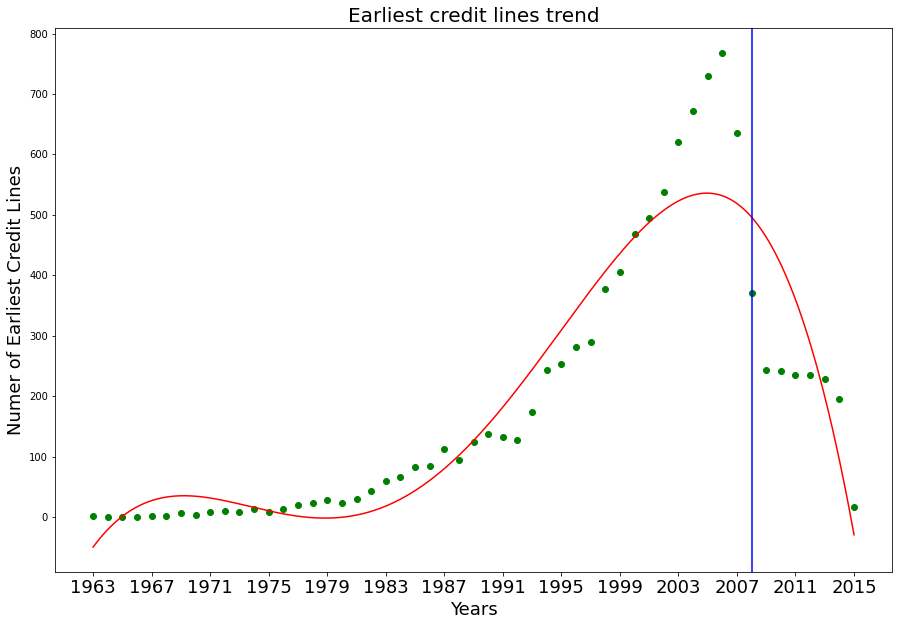

In [230]:
credit_lines = loan_data.groupby(['earliest_credit_line']).count().reset_index()
plt.figure(figsize = (15,10))


# polynomial regression over the scatterplot
mymodel = np.poly1d(np.polyfit(credit_lines['earliest_credit_line'],credit_lines['interest_rate'], 4))
myline = np.linspace(1963, 2015, 900)

# plotting the scatter plot
plt.scatter(credit_lines['earliest_credit_line'],credit_lines['interest_rate'], color = 'green')

# labelling the plot
plt.plot(myline, mymodel(myline), color = 'red')
plt.axvline(x = 2008, color = 'b', ymin = 0, ymax = 800, label='2008')
plt.xticks(list(credit_lines['earliest_credit_line'])[::4], fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Numer of Earliest Credit Lines', fontsize=18)
plt.title("Earliest credit lines trend", fontsize=20 )
plt.show()


From this plot we can observe that number of earliest credit lines created increased as the year progresseed initially. However, we see a sudden drop in the value around 2008 as per the __"blue line"__. This might have been due to the economic crisis and the impact might have continued till 2015. The shoot in the curve prior to 2008 can be considered due to the expansion of the economic bubble prior to its burst

### 5. Interest rate for riskier customers (loan borrowers) base on theit deb to income ratio

Plotting the interest rate againt normalized debt_to_income ratio


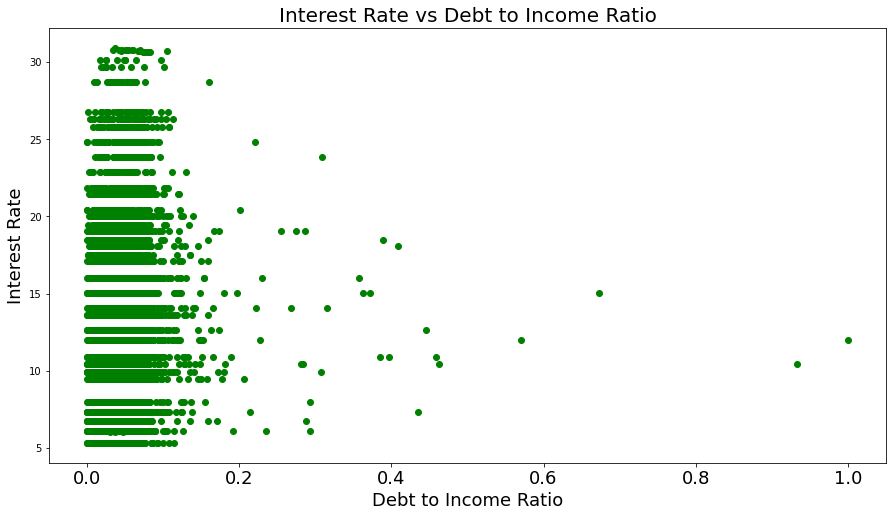

In [239]:
# Higher the debt to income ratio riskier is the borrower. Hence higher interest rate
plt.figure(figsize = (15,8))

# normalizing the debt to income ratio
normalized_di=(loan_data['debt_to_income']-loan_data['debt_to_income'].min())/(loan_data['debt_to_income'].max()-loan_data['debt_to_income'].min())
plt.scatter(normalized_di,loan_data['interest_rate'], color = 'green')

# labelling the plot
plt.xlabel('Debt to Income Ratio', fontsize=18)
plt.ylabel('Interest Rate', fontsize=18)
plt.title("Interest Rate vs Debt to Income Ratio", fontsize=20 )
plt.xticks(fontsize=18)
plt.show()

Here we observe that interest rate are higher for customers with low debt_to_income ratio and vice versa. Thus we can conlude that customers with higher debt_to_income ratio can be deemed as riskier. So, debt_to_income ratio can become be an important parameter in deciding the risk factor associated with a loan applicant

## 5. Data Cleaning

After describing the data we have indentified the columns with missing values.


For cleaning the dataframe we will go column by column and analysis of each column will follow three strategies mentioned below - 


1. Missing value count being more than 60% -> Removing the column
2. Missing value count less than 60%-> Perform data imputation techniques based on distribution of columns and their correlation with other predictors

We will first start with splitting dataframe into train and test data to keep test data invisible to the model. We will apply all the tranformations and cleaning techniques of the train data to the test data

In [14]:
from sklearn.model_selection import train_test_split
X = loan_data.drop(columns=['interest_rate'])
y = loan_data['interest_rate']
loan_data_clean, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [15]:
# List of missing values for the train data
loan_data_clean.isna().sum()

emp_title                            571
emp_length                           562
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        16
annual_income_joint                 5958
verification_income_joint           5984
debt_to_income_joint                5958
delinq_2y                              0
months_since_last_delinq            3970
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               5395
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

### 1) Missing value count being more than 60%
The columns 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint' and 'months_since_90d_late' have around 70% missing values. Imputing values in these columns based on the distibution of non null points might give unexpected values and affect the prediction of outcome. Hence we will remove these columns

Similarly the column 'num_accounts_120d_past_due' either comprises of null values or 0. The value 0 means that there no current accounts that are 120 days past due. Hence we remove this column as well.

We can also drop the columns 'loan_purpose', 'emp_title', 'state' as they have too many categoeries to be considered as factors. So we will remove these columns as well.

In [16]:
loan_data_clean = loan_data_clean.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','emp_title','state','loan_purpose','num_accounts_120d_past_due','months_since_90d_late'])

X_test = X_test.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','emp_title','state','loan_purpose','num_accounts_120d_past_due','months_since_90d_late'])

loan_data_clean.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9069,10.0,MORTGAGE,80000.0,Not Verified,9.35,0,66.0,2006,1,25,...,A3,Jan-2018,Current,whole,Cash,10474.00,1840.52,1526.00,314.52,0.0
2603,NaN,MORTGAGE,39804.0,Verified,16.73,0,32.0,2002,7,26,...,A5,Feb-2018,Current,whole,DirectPay,4501.41,620.95,498.59,122.36,0.0
7738,3.0,MORTGAGE,104465.0,Not Verified,25.60,1,20.0,2001,1,40,...,A5,Mar-2018,Current,whole,Cash,18509.07,1870.24,1490.93,379.31,0.0
1579,10.0,MORTGAGE,115000.0,Not Verified,19.42,1,23.0,1977,1,38,...,C2,Jan-2018,Current,whole,Cash,11843.99,1443.04,756.01,687.03,0.0
5058,NaN,RENT,15000.0,Verified,19.44,0,45.0,2006,2,19,...,B2,Jan-2018,Current,fractional,Cash,2915.12,1195.06,1084.88,110.18,0.0


### 2) Missing value being less than 60%

*emp_length* and *months_since_last_credit_inquiry*

In [17]:
# correlation plot
corr_1 = loan_data_clean.corr()
corr_1[['emp_length','months_since_last_credit_inquiry']].T

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.093786,0.020555,0.007430,0.023025,-0.230224,-0.001808,0.130663,0.060338,0.149649,...,0.019437,0.040337,0.079279,0.059371,0.063905,0.071156,0.032115,0.026800,0.044577,0.014087
months_since_last_credit_inquiry,0.011337,-0.050721,0.027152,0.008841,-0.029709,-0.011792,-0.540694,-0.148944,-0.121904,-0.068176,...,-0.017010,-0.048804,-0.026795,-0.019449,-0.031594,-0.017794,-0.028509,-0.022368,-0.050266,-0.034309


The columns 'emp_length' and 'months_since_last_credit_inquiry' are not highly correlated to any other column. So we can go ahead with it imputing values with considering distributions of other columns. For imputation we will use 3 parameters - mean, median and mode

Employee experience can vary from 1 to a higher value of 60. Here all the employees with more than 10 years of experience are lables with the experience of 10 years. So, the mode is 10. Generally employees with higher experience are in the position to get settled. Since we are dealing approved loans we will go ahead with imputing the missing values with __"mode"__.

Similary for the column __"months_since_last_credit_inquiry"__ the distribution is skewed to the right.

Looking at the non normal distribution of the predictors and values of mean and median we can concluded that these values will affect the distribution of the predictor. 

Hence we will go ahead imputing the missing values with mode

In [18]:
def mode_imputation(col_name):
  """Function to impute the missing values in a columns with mode"""
  para  = [loan_data_clean[col_name].mean(), loan_data_clean[col_name].median(),loan_data_clean[col_name].mode()[0]]
  print("Mean: ", para[0])
  print("Mean: ", para[1])
  print("Mean: ", para[2])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution before imputation")

  loan_data_clean[col_name] = loan_data_clean[col_name].fillna(loan_data_clean[col_name].mode()[0])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution after imputation")
  plt.show()

Mean:  5.964585274930102
Mean:  6.0
Mean:  10.0


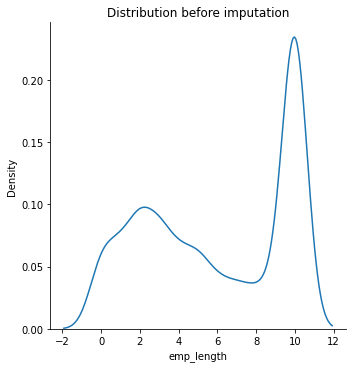

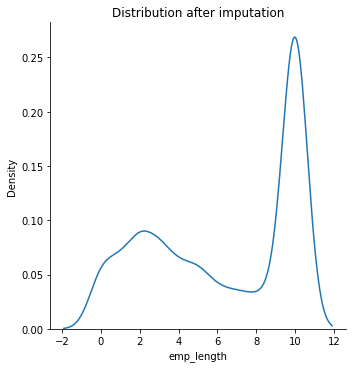

In [19]:
# mode imputation for emp_length
mode_imputation("emp_length")

# applying the same method to test data
X_test["emp_length"] = X_test['emp_length'].fillna(X_test['emp_length'].mode()[0])

Mean:  7.3772690106295995
Mean:  6.0
Mean:  1.0


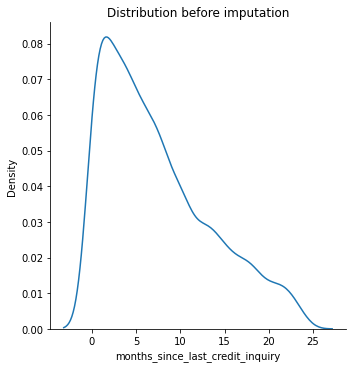

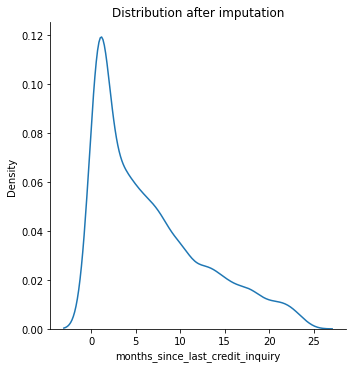

In [20]:
# mode imputation for months_since_last_credit_inquiry
mode_imputation("months_since_last_credit_inquiry")

# applying the same method to test data
X_test["months_since_last_credit_inquiry"] = X_test['months_since_last_credit_inquiry'].fillna(X_test['months_since_last_credit_inquiry'].mode()[0])

*months_since_last_delinq*

In [21]:
# correlation plot
corr_months_since_last_delinq = loan_data_clean.corr()
corr_months_since_last_delinq = corr_months_since_last_delinq[['months_since_last_delinq']]
corr_months_since_last_delinq[abs(corr_months_since_last_delinq['months_since_last_delinq'])>0.5]

,months_since_last_delinq
delinq_2y,-0.56173
months_since_last_delinq,1.00000


After plotting the correlation plot for the __"months_since_last_delinq"__ we observe that it is has a high negative correlation with __"delinq_2y"__, since more the Delinquencies, more is the frequnecy and less is the time between two deliquencies.

Thus, we will impute the missing values with a univariate approach. We will predict the __"months_since_last_delinq"__ column using the columns with which it is highly correlated. We will use the IterativeImputer package from sklearn


In [22]:
# importing the pacakge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# initializing the imputer
impute_it = IterativeImputer()

# imputing the missing values with multivariate regression
regression_imputation = loan_data_clean[['delinq_2y','months_since_last_delinq']]
a = impute_it.fit_transform(regression_imputation)
loan_data_clean['months_since_last_delinq'] =np.round(a[:,1],2)

# confirming the count of missing values as 0
print("Missing value count for train data", loan_data_clean['months_since_last_delinq'].isna().sum())

#Now we apply the same to test data
# imputing the missing values with multivariate regression
regression_imputation_test = X_test[['delinq_2y','months_since_last_delinq']]
a_test = impute_it.fit_transform(regression_imputation_test)
X_test['months_since_last_delinq'] =np.round(a_test[:,1],2)

# confirming the count of missing values as 0
print("Missing value count for test data", X_test['months_since_last_delinq'].isna().sum())


Missing value count for train data 0
Missing value count for test data 0


*debt_to_income*

In [23]:
corr_2 = loan_data_clean.corr()
corr_2[['debt_to_income']].T

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
debt_to_income,0.033903,-0.179991,1.0,-0.02067,0.029157,-0.081309,0.026408,0.202499,0.225781,0.081329,...,-0.004098,-0.004076,0.056582,0.028887,0.071896,0.063211,0.002276,-0.012348,0.109332,-0.009181


The column __"debt_to_income"__  does not have high correlation with any other columns. 
Here the the data is right skewed so mean is out of question. Since this is a continuous variable and the mode frequency not being distinctly high with respect to other values we can go ahead with median imputation for this column

Mean :  19.25594358533789
Median :  17.634999999999998
Mode :  0    0.0
dtype: float64


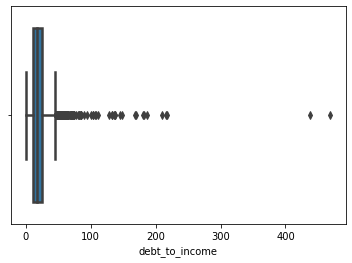

In [24]:
# sns.displot(loan_data_clean, x="debt_to_income", kind="kde")
ax = sns.boxplot(x="debt_to_income",data=loan_data_clean, linewidth=2.5)
print("Mean : ", loan_data_clean['debt_to_income'].mean())
print("Median : ", loan_data_clean['debt_to_income'].median())
print("Mode : ", loan_data_clean['debt_to_income'].mode())

In [25]:
loan_data_clean['debt_to_income'] = loan_data_clean['debt_to_income'].fillna(loan_data_clean['debt_to_income'].median())
print("The missing value count for train data", loan_data_clean['debt_to_income'].isna().sum())

#Applying same imputation to the test data
X_test['debt_to_income'] = X_test['debt_to_income'].fillna(X_test['debt_to_income'].median())
print("The missing value count for test data", X_test['debt_to_income'].isna().sum())


The missing value count for train data 0
The missing value count for test data 0


Now that we have removed all the missing values we will have to format the categorical variables

### 1. Formatting binary variables
*disbursement_method*

We can drop the binary categorical variable __"disbursement_method"__ as it is highly imbalanced. Approximately 93% of data belongs to the class __"Cash"__.

In [26]:
loan_data_clean['disbursement_method'].value_counts()

Cash         6495
DirectPay     505
Name: disbursement_method, dtype: int64


*initial_listing_status*

We can drop the binary categorical variable __"initial_listing_status"__ as it is highly imbalanced. Approximately 82% of data belongs to the class __"whole"__.
Which means there are very few instance of __"fractional"__ which can contribute towards prediction. The dataset description does not precisely mention the use of this variable. So it is better to go ahead by disregarding this variable.

In [27]:
loan_data_clean['initial_listing_status'].value_counts()

whole         5730
fractional    1270
Name: initial_listing_status, dtype: int64

*application_type*

The column __"application_type"__ also has a disporportionate distribution. Moreover, we have already removed certain predictors pertaining to join appliation. Hence dropping this column. We can consider joint application in a separate analysis

In [28]:
loan_data_clean['application_type'].value_counts()

individual    5958
joint         1042
Name: application_type, dtype: int64

In [29]:
loan_data_clean = loan_data_clean.drop(columns=['initial_listing_status','disbursement_method','application_type'])

# applying the same formatting to test data
X_test = X_test.drop(columns=['initial_listing_status','disbursement_method','application_type'])


loan_data_clean.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,installment,grade,sub_grade,issue_month,loan_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9069,10.0,MORTGAGE,80000.0,Not Verified,9.35,0,66.0,2006,1,25,...,369.00,A,A3,Jan-2018,Current,10474.00,1840.52,1526.00,314.52,0.0
2603,10.0,MORTGAGE,39804.0,Verified,16.73,0,32.0,2002,7,26,...,156.62,A,A5,Feb-2018,Current,4501.41,620.95,498.59,122.36,0.0
7738,3.0,MORTGAGE,104465.0,Not Verified,25.60,1,20.0,2001,1,40,...,626.36,A,A5,Mar-2018,Current,18509.07,1870.24,1490.93,379.31,0.0
1579,10.0,MORTGAGE,115000.0,Not Verified,19.42,1,23.0,1977,1,38,...,290.51,C,C2,Jan-2018,Current,11843.99,1443.04,756.01,687.03,0.0
5058,10.0,RENT,15000.0,Verified,19.44,0,45.0,2006,2,19,...,128.94,B,B2,Jan-2018,Current,2915.12,1195.06,1084.88,110.18,0.0


### 2. Formatting variables with more than 2 categories
*homeownership*

The homeownership has 3 classes as mentioned below. However the risk of loan disbursement depends more on the fact that it is against a mortgage or not. Hence we can go ahead with combining the class __"OWN"__ and __"RENT"__ and __"NON_MORTGAGE"__. This also ensures that the class count is balanced.

In [30]:
loan_data_clean['homeownership'].value_counts()

MORTGAGE    3375
RENT        2663
OWN          962
Name: homeownership, dtype: int64

In [31]:
loan_data_clean.replace("OWN", "NON_MORTGAGE", inplace =True)
loan_data_clean.replace("RENT", "NON_MORTGAGE",inplace =True)

# applying the same formatting to test data
X_test.replace("OWN", "NON_MORTGAGE", inplace =True)
X_test.replace("RENT", "NON_MORTGAGE",inplace =True)


loan_data_clean['homeownership'].value_counts()

NON_MORTGAGE    3625
MORTGAGE        3375
Name: homeownership, dtype: int64

In [32]:
loan_data_clean['MORTGAGE'] = pd.get_dummies(loan_data_clean['homeownership'])['MORTGAGE']
loan_data_clean = loan_data_clean.drop(columns=['homeownership'])

# applying the same formatting to test data
X_test['MORTGAGE'] = pd.get_dummies(X_test['homeownership'])['MORTGAGE']
X_test = X_test.drop(columns=['homeownership'])


*verified_income*

This column has 3 caregories, but the distribution is not highly imbalanced. So we can make use on hot coding.

reference article - https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64

In [33]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

def onehotencoding(data_1):
  """Function to perform one hot encoding on categorical data"""
  le = LabelEncoder()
  data_1['verified_income_enocded'] = le.fit_transform(data_1.verified_income)

  encoder = OneHotEncoder(categories = 'auto')
  X = encoder.fit_transform(
    data_1['verified_income_enocded'].values.reshape(-1,1)).toarray()
  dfonehot = pd.DataFrame(X, columns = ['isNotVerifed','isSourceVerified','isVerified'])

  # Concatenating the one hot encoded data to the original data frame
  data = pd.concat([data_1, dfonehot], axis =1)

  #droping encoding column
  data_1.drop(columns=['verified_income','verified_income_enocded'], inplace=True)


In [34]:
# Applying onehotencoding to train data
onehotencoding(loan_data_clean)

# Applying onehotencoding to test data
onehotencoding(X_test)

*sub_grade*

reference link - https://www.lendingclub.com/foliofn/rateDetail.action

Quoted from the reference link

"The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5."

Considering this we will drop the grade columns and rank the subgrade with __"A1"__ being the lowest and __"G5"__ being the highest.


In [35]:
def rankinggrade(data):
  """"Ranking the grade categories in a column"""
  l = sorted(list(data.sub_grade.unique()))
  rank = {}
  for i in range(len(l)):
    rank[l[i]] =i+1
  data['sub_grade_rank'] = [rank[ele] for ele in data['sub_grade']]

  data.drop(columns=['grade','sub_grade'], inplace=True)

In [36]:
# Applying ranking to train data
rankinggrade(loan_data_clean)

# Applying ranking to test data
rankinggrade(X_test)

*loan_status*

The column is highly dispropotionate with a high class imbalance within its categories. Majority of the columns are either paid or up to date on all outstanding payments.
This dataset does not have sufficient cases of the loan not being repayed or paid with a delay. Hence we can remove this column

In [37]:
loan_data_clean = loan_data_clean.drop(columns=['loan_status'])

# Applyingt the same formatting to test data
X_test = X_test.drop(columns=['loan_status'])


### 3. Time series variables

*issue_month*

The issue months mentions the date of issue of the loan. We will drop this columns since the date is just 3 days of for 3 months

In [38]:
loan_data_clean = loan_data_clean.drop(columns=['issue_month'])

# Applyingt the same formatting to test data
X_test = X_test.drop(columns=['issue_month'])


In [39]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        7000 non-null   float64
 1   annual_income                     7000 non-null   float64
 2   debt_to_income                    7000 non-null   float64
 3   delinq_2y                         7000 non-null   int64  
 4   months_since_last_delinq          7000 non-null   float64
 5   earliest_credit_line              7000 non-null   int64  
 6   inquiries_last_12m                7000 non-null   int64  
 7   total_credit_lines                7000 non-null   int64  
 8   open_credit_lines                 7000 non-null   int64  
 9   total_credit_limit                7000 non-null   int64  
 10  total_credit_utilized             7000 non-null   int64  
 11  num_collections_last_12m          7000 non-null   int64  
 12  num

# 6. Data Mondelling

Now we will perform regression on the data and check the model's performance on the unknown test data

We will make use of 2 types of models to perform the analysis

## 1. Linear Regression

We will first use the linear regression to test the model

In [40]:
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
X_train  = loan_data_clean
LR = LinearRegression()

# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
#prdicting the the interest values using the fitted model
y_prediction_lr =  LR.predict(X_test)
y_prediction_lr

array([ 5.58371823, 15.60069787, 15.40685274, ...,  8.11715664,
       11.45006453,  7.28599954])

For evaluating the model performance we will make use of the __"r-suared"__, __"mean squared error"__ and __"root mean squared error"__

In [42]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score_lr=r2_score(y_test,y_prediction_lr)
print('r2 socre is ',score_lr)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_lr))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_lr)))

r2 socre is  0.9885218992223285
mean_sqrd_error is== 0.29411273669398347
root_mean_squared error of is== 0.5423216173950505


CHecking the performance of the model based on assumptions considered in a linear regression model

1. Linearity Assumption - For a multivariate regresson we assume that the predicted and actual values have a linear relationship

In [43]:
 # Plotting the actual vs predicted values
# sns.lmplot(y_test, y_prediction_lr,data = X_test, fit_reg=False, size=7)
        
    # # Plotting the diagonal line
    # line_coords = np.arange(df_results.min().min(), df_results.max().max())
    # plt.plot(line_coords, line_coords,  # X and y points
    #          color='darkorange', linestyle='--')
    # plt.title('Actual vs. Predicted')
    # plt.show()

## 2. Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [45]:
#prdicting the the interest values using the fitted model
y_prediction_rf =  regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf,2)
y_prediction_rf

array([ 6.08, 15.04, 15.04, ...,  7.97, 10.9 ,  7.35])

In [46]:
score_rf=r2_score(y_test,y_prediction_rf)
print('r2 socre is ',score_rf)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_rf))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_rf)))

r2 socre is  0.9994462976576234
mean_sqrd_error is== 0.014187966666666663
root_mean_squared error of is== 0.1191132514318481


#7. Description of my approach

# 8. Assumptions made

# 9. Future enhancements 